In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
data_path = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/preprocessed_day.csv"
df = pd.read_csv(data_path , encoding= 'unicode_escape')

In [4]:
df.head()

,instant,yr,holiday,workingday,atemp,hum,windspeed,cnt,Date,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,0,0,0.363625,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,2,0,0,0,0.353739,0.696087,0.248539,801,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3,0,0,1,0.189405,0.437273,0.248309,1349,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,4,0,0,1,0.212122,0.590435,0.160296,1562,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,5,0,0,1,0.229270,0.436957,0.186900,1600,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [5]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [6]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,instant,17.878747
1,yr,8.870901
2,holiday,1.092017
3,workingday,3.254164
4,atemp,8.916371
5,hum,12.526981
6,windspeed,5.123071
7,Date,4.090027


In [7]:
df = df.drop(['instant','hum'], axis=1)   # try removing these first
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.944177
1,holiday,1.082659
2,workingday,3.095602
3,atemp,5.520659
4,windspeed,4.579780
5,Date,3.733595


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   atemp         731 non-null    float64
 4   windspeed     731 non-null    float64
 5   cnt           731 non-null    int64  
 6   Date          731 non-null    int64  
 7   season_2      731 non-null    bool   
 8   season_3      731 non-null    bool   
 9   season_4      731 non-null    bool   
 10  mnth_2        731 non-null    bool   
 11  mnth_3        731 non-null    bool   
 12  mnth_4        731 non-null    bool   
 13  mnth_5        731 non-null    bool   
 14  mnth_6        731 non-null    bool   
 15  mnth_7        731 non-null    bool   
 16  mnth_8        731 non-null    bool   
 17  mnth_9        731 non-null    bool   
 18  mnth_10       731 non-null    

## Model Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [10]:
# Creating dependent and independent variables
dependent_variable = 'cnt'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['mnth_6',
 'weekday_2',
 'weekday_1',
 'weathersit_3',
 'season_4',
 'mnth_3',
 'workingday',
 'mnth_8',
 'mnth_11',
 'season_2',
 'weekday_3',
 'holiday',
 'mnth_2',
 'windspeed',
 'season_3',
 'mnth_12',
 'yr',
 'mnth_5',
 'Date',
 'mnth_7',
 'mnth_10',
 'weekday_5',
 'mnth_9',
 'mnth_4',
 'weekday_6',
 'weekday_4',
 'atemp',
 'weathersit_2']

In [11]:
y = np.sqrt(df['cnt'])
X = df.drop('cnt',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 28)
(584,)
(147, 28)
(147,)


In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [15]:
import joblib 
import os 

# Your specific directory
save_dir = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files"

# Create folder if missing
os.makedirs(save_dir, exist_ok=True)

# Final file path
save_path = os.path.join(save_dir, "lr_scaler.pkl")

# Save scaler
with open(save_path, 'wb') as f:
    joblib.dump(scaler, f)

print(f"Scaler saved successfully at: {save_path}")

Scaler saved successfully at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files/lr_scaler.pkl


In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train[0:10]

array([[-0.99317398, -0.16783627,  0.66749124, -0.89210862,  0.49077526,
        -0.86650157,  1.68585446, -0.57735027, -0.57735027, -0.2819263 ,
        -0.31264095,  3.34165628, -0.31919711, -0.30263639, -0.29240701,
        -0.30263639, -0.27478436, -0.31264095, -0.3093296 , -0.3093296 ,
        -0.40129017, -0.42121177, -0.40987803, -0.40702415,  2.43975018,
        -0.40416162,  1.40697969, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.48996575, -0.68939939,
         0.28646475,  1.68585446, -0.57735027, -0.57735027, -0.2819263 ,
        -0.31264095, -0.2992528 ,  3.13286048, -0.30263639, -0.29240701,
        -0.30263639, -0.27478436, -0.31264095, -0.3093296 , -0.3093296 ,
        -0.40129017, -0.42121177, -0.40987803, -0.40702415,  2.43975018,
        -0.40416162, -0.71074232, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.83666431, -0.94161059,
        -1.3276881 , -0.59317101, -0.57735027,  1.73205081, -0.2819263 ,
        -0.31264095, -0.2992

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "linear_regression.pkl")

# Save the model
joblib.dump(regressor, file_path)

print(f"Model saved at: {file_path}")

Model saved at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files/linear_regression.pkl


In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([64.79655833, 69.09163537, 36.56381416, 41.49634693, 56.94038643,
       39.05157243, 60.5466409 , 80.03918772, 73.93663145, 36.07184401,
       40.24862044, 38.39584371, 40.15250538, 69.92932642, 68.04294573,
       60.49963876, 82.08154516, 78.17112719, 53.2777986 , 52.48864794,
       85.18051554, 50.87268931, 71.2328757 , 66.82452741, 44.41100283,
       75.8663851 , 74.70554152, 67.46159695, 82.84904398, 81.88639139,
       31.24068622, 73.5230823 , 76.10968664, 68.74045514, 45.63824958,
       57.76845166, 82.37353588, 88.11876218, 53.8034383 , 55.20841102,
       77.09082001, 38.10419681, 73.36212272, 59.51404609, 86.74891606,
       84.77058854, 50.37015536, 61.56214672, 56.63437257, 45.89833619,
       80.98738543, 81.29577962, 68.41935924, 79.96170483, 66.02047812,
       58.99315854, 54.29027958, 82.2346823 , 80.17357639, 60.08884511,
       79.47438938, 62.57509263, 75.70141287, 83.68220394, 82.68847262,
       45.6818588 , 72.04254594, 70.53545849, 84.71717533, 71.14

## Model Evaluation 


In [21]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.577394268703621.
The Mean Squred Error(MSE) is 37.73273734443017.
The Root Mean Squared Error(RMSE) is 6.1426978880969045.
The R2 Score is 0.8671644812390028.
Adjusted R2 is 0.8356441886516475.


In [22]:
regressor.coef_

array([ 7.54009291, -0.31604651,  0.92370284,  6.53409452, -1.24317479,
       -0.84106389,  3.20132699,  3.79585096,  5.81808481,  0.61525998,
        1.70806277,  1.07206131,  1.9300251 ,  1.20509811, -0.07777242,
        0.82421088,  1.56990233,  0.95316217,  0.01128208,  0.07543056,
       -0.22228962,  0.1827676 ,  0.12650257,  0.39836656,  0.57816085,
        0.85300167, -2.42066888, -3.85846288])

In [23]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
yr,7.540093
holiday,-0.316047
workingday,0.923703
atemp,6.534095
windspeed,-1.243175
Date,-0.841064
season_2,3.201327
season_3,3.795851
season_4,5.818085
mnth_2,0.615260


In [24]:
regressor.intercept_

np.float64(65.2413014457131)

In [25]:
regressor.score(X_train,y_train)

0.8317058410036114

In [26]:
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [27]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.5774,37.7327,6.1427,0.8672,0.8356


In [28]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [29]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [30]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

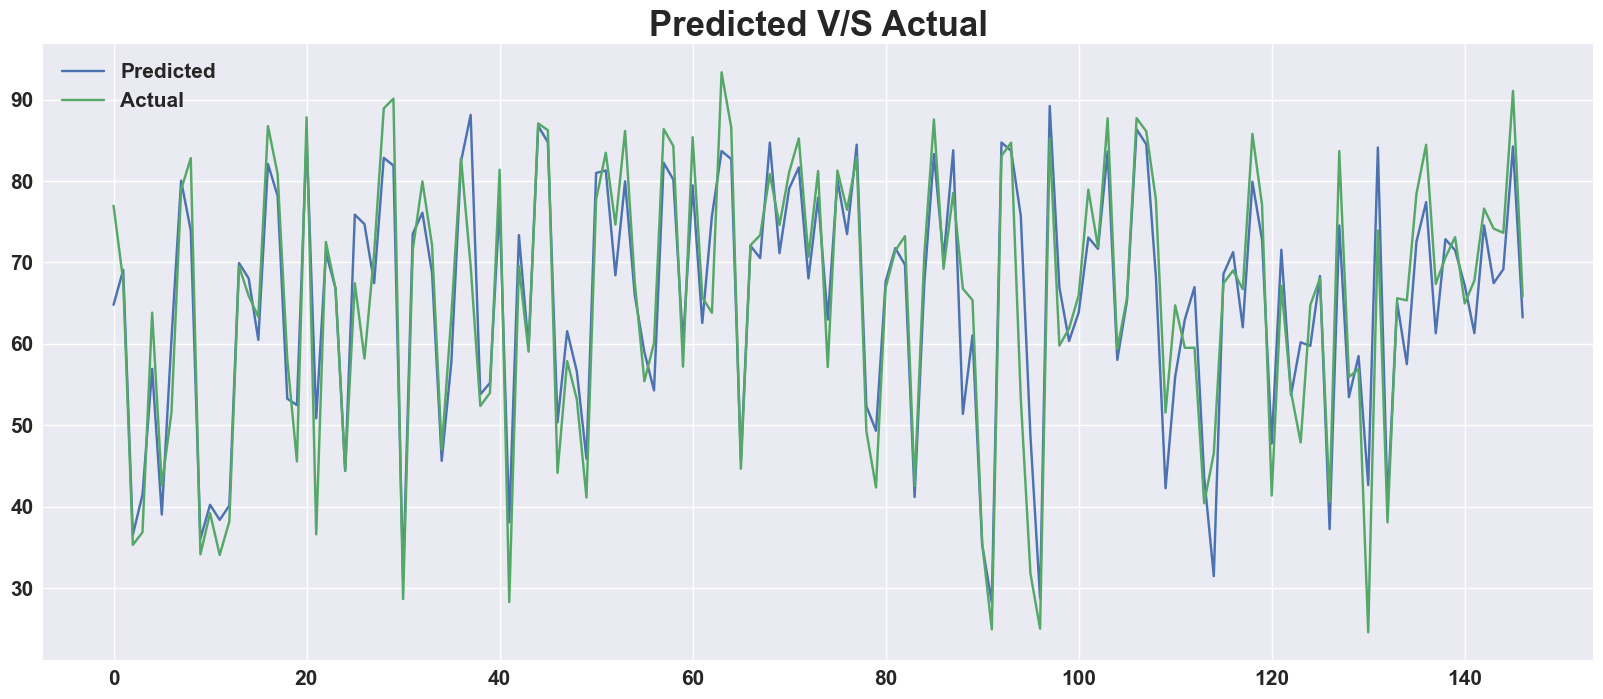

In [31]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

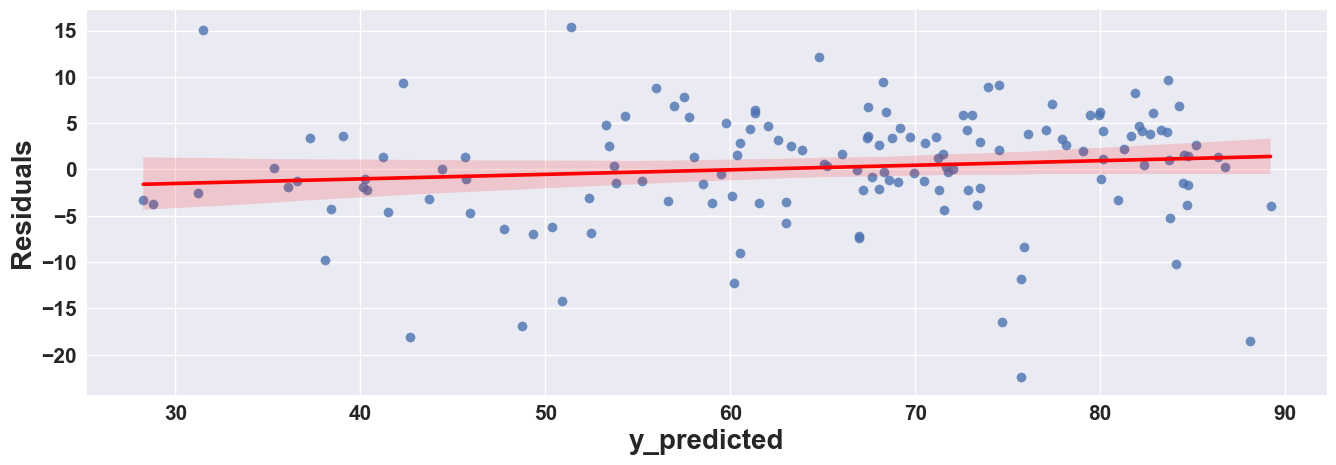

In [32]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

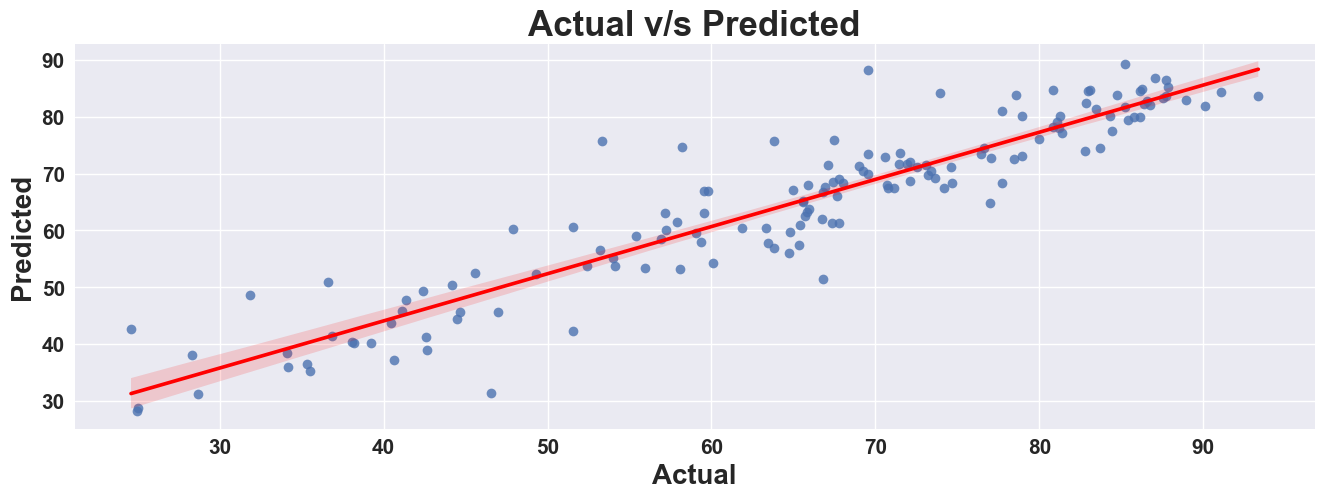

In [33]:
plot_scatter(y_pred,y_test)

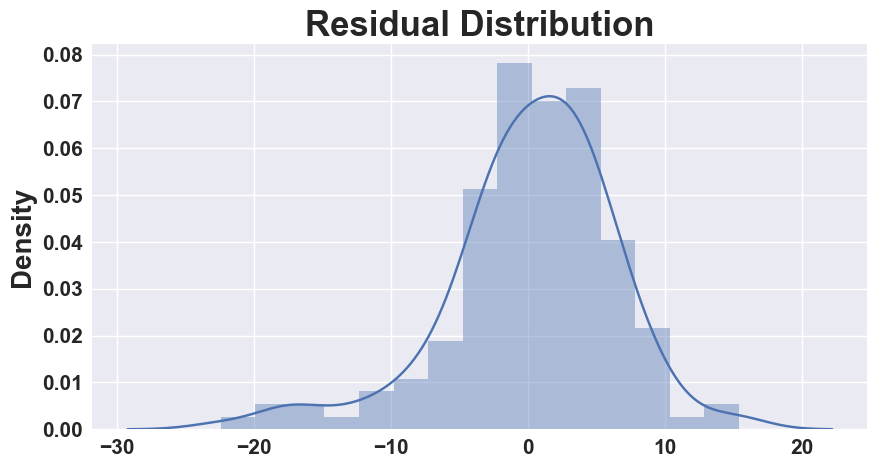

In [34]:
Residual_distPlot(y_pred,y_test)